# Shop Customer Segmentation

## About Dataset

Shop Customer Data is a comprehensive dataset that provides a detailed analysis of a hypothetical shop's ideal customers. By collecting and analyzing customer data through membership cards, this dataset provides valuable insights that can help a business better understand its customers.

The dataset includes 2000 records and 8 columns, providing a wealth of information about the shop's customer base. Each column represents a specific aspect of the customer's profile, including their unique Customer ID, Gender, Age, Annual Income, Spending Score, Profession, Work Experience, and Family Size.

By analyzing this data, businesses can gain valuable insights into their customers' preferences, behaviors, and purchasing habits. For example, they can segment customers by age, income, or family size to better understand how these factors impact their purchasing decisions.

## Data Dictionary

**Customer ID**

* Numerical
* It is a unique identifier for each customer.

**Gender**

* Categorical
* The gender of the customer, either **Male** or **Female**. Gender can be used to analyze purchasing behavior and preferences between genders.

**Age**
* Numerical
* he age of the customer, usually measured in years. Age can be used to segment customers into different age groups, which can help identify purchasing patterns and preferences among different age groups.

**Income**
* Numerical
* The annual income of the customer, usually measured in dollars or another currency. Annual income can be used to segment customers into different income groups, which can help identify purchasing patterns and preferences among different income levels.

**Spending Score**
* Numerical
* A score assigned by the shop based on the customer's behavior and spending nature. This score can be used to segment customers based on their purchasing patterns, such as high-spending customers, low-spending customers, and customers who are likely to make impulse purchases.


**Profession**

* Categorical
* The occupation or profession of the customer. Profession can be used to analyze purchasing patterns and preferences among different professions.

**Work Experience**

* Numerical
* The number of years of work experience of the customer. This feature can be used to segment customers based on their level of experience, which can help identify purchasing patterns and preferences among different experience levels.

**Family Size**

* Numerical
* The size of the customer's family, usually measured in terms of the number of family members. Family size can be used to analyze purchasing patterns and preferences among different family sizes, such as families with children versus families without children.

## Problem Statement

* Conduct an in-depth Exploratory Data Analysis on a dataset, uncovering insights, patterns, and relationships within the data.
* Create a profile for different groups(or clusters) of customers those are frequent in a particular shop.

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Reading dataset and getting an idea about what it contains

In [ ]:
# Load dataset
import os
folder_path = "drive/MyDrive/Colab Notebooks/dscourse/data"
csv_path = os.path.join(folder_path, "Customers.csv")

In [ ]:
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


#### Cleaning up column names for better handling

In [ ]:
cols_cleaned = []
for col in df.columns:
  cols_cleaned.append(col.split('(')[0].strip().lower().replace(' ', "_"))
df.columns = cols_cleaned

# Sanity check
df.head()

,customerid,gender,age,annual_income,spending_score,profession,work_experience,family_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
# Shape of Dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 2000
Number of columns: 8


##### Missing Value Detection

Missing value detection is essential to chack the quality of the data. If present impute it with proper value so that quality of the data is maintained for robust statistical analysis.

In [ ]:
df.isnull().sum()

customerid          0
gender              0
age                 0
annual_income       0
spending_score      0
profession         35
work_experience     0
family_size         0
dtype: int64

### Observation

* Profession feature has 35 missing values.
* As it is a categorical feature we impute the missing values with "Other".

In [ ]:
df["profession"].fillna("Other", inplace= True)

# Sanity check
df.isnull().sum()

customerid         0
gender             0
age                0
annual_income      0
spending_score     0
profession         0
work_experience    0
family_size        0
dtype: int64

#### Duplicate Row Detection

Detecting duplicate rows and removing them is vital for ensuring quality of data, integrity, accuracy and performance.

In [ ]:
print(f"Number of duplicate rows: {df[df.duplicated()].shape[0]}")

Number of duplicate rows: 0


#### Remove Unnecessary Columns

Removing unnecessary columns helps in reducing noise, optimizing resources and enhance quality and clarity of data.

Here CustomerID column is not needed for EDA or modeling, so it should be removed.

In [ ]:
df.drop("customerid", axis=1, inplace=True)

In [ ]:
# Sanity check
df.head()

,gender,age,annual_income,spending_score,profession,work_experience,family_size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


#### Checking Data Types

By checking datatype of each column we can identify the categorical and numerical columns present in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           2000 non-null   object
 1   age              2000 non-null   int64 
 2   annual_income    2000 non-null   int64 
 3   spending_score   2000 non-null   int64 
 4   profession       2000 non-null   object
 5   work_experience  2000 non-null   int64 
 6   family_size      2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 109.5+ KB


In [ ]:
cat_columns = []
num_columns = []
for col in df.columns:
  if df[col].dtype == 'object':
    cat_columns.append(col)
  else :
    num_columns.append(col)

print(f"Number of categorical columns: {len(cat_columns)}")
print(f"Categorical columns: {cat_columns}")
print("-" * 60)
print(f"Number of numerical columns: {len(num_columns)}")
print(f"Numerical columns: {num_columns}")

Number of categorical columns: 2
Categorical columns: ['gender', 'profession']
------------------------------------------------------------
Number of numerical columns: 5
Numerical columns: ['age', 'annual_income', 'spending_score', 'work_experience', 'family_size']


#### Distribution of Numeric Columns

Checking and visualizing the distribution of numeric columns is vital for understanding the underlying characteristics of the data such as central tendency, spread & variablity of data and also understand whether the data is symmetrically distributed or skewness is present in the data.

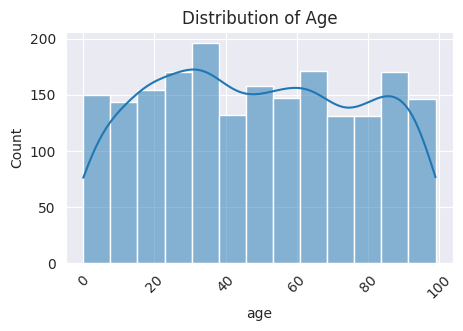

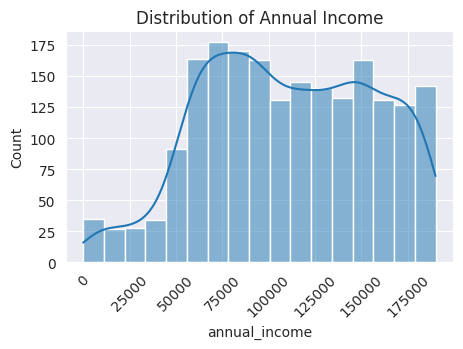

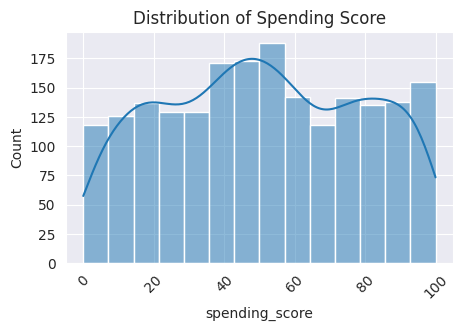

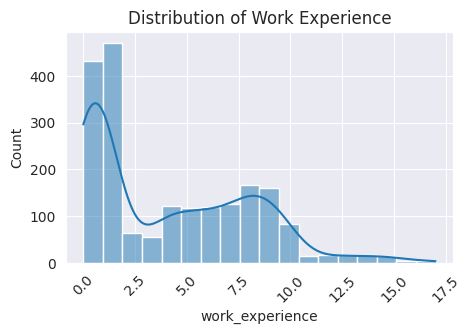

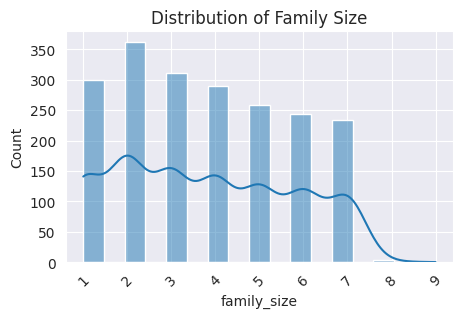

In [ ]:
for col in num_columns:
  fig, axes = plt.subplots(figsize=(5, 3))
  sns.histplot(data= df, x= col, kde= True)
  axes.set_title(f"Distribution of {col.replace('_', ' ').title()}")
  plt.xticks(rotation=45)

### Observations

* None of the numeric features are normally distributed.


#### Overview of Categorical columns

It helps us to identify proportion of each category contributed to the sample.

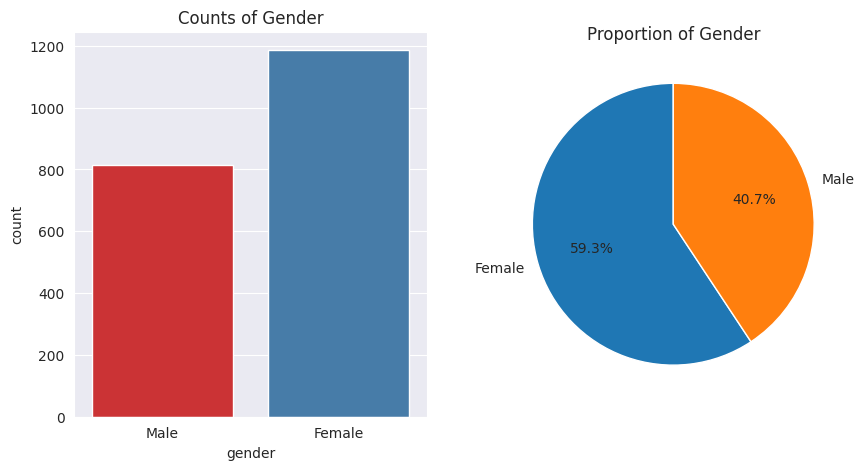

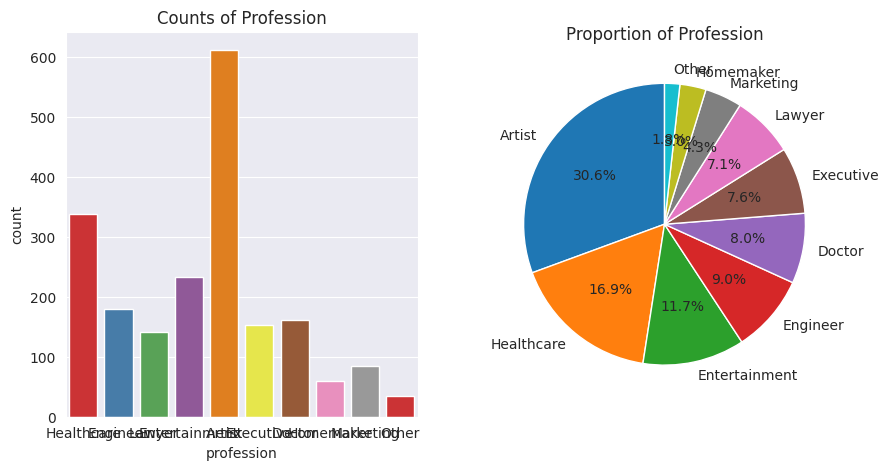

In [ ]:
for col in cat_columns:
  fig, axes = plt.subplots(nrows= 1, ncols=2,figsize=(10,5))

  sns.countplot(ax=axes[0], data= df, x= col, hue= col, palette="Set1")
  axes[0].set_title(f"Counts of {col.replace('_', ' ').title()}")
  # axes[0].set_xticks(rotation=90)

  plt.pie(x= df[col].value_counts(), labels= df[col].value_counts().index, autopct="%1.1f%%", startangle=90)
  axes[1].set_title(f"Proportion of {col.replace('_', ' ').title()}")


### Observations

* Nothing unexpected found. All are in good proportion.

## Data Preprocessing

Since most machine learning models work with numeric data, we need to convert categorical data into numeric values. One way to do this is by using the Label Encoder from the scikit-learn library, which assigns a unique numerical label to each category in a column.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1 = df.copy()
for col in cat_columns:
  lc = LabelEncoder()
  df1[col] = lc.fit_transform(df[col])

In [ ]:
df1

,gender,age,annual_income,spending_score,profession,work_experience,family_size
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1
3,0,23,59000,77,7,0,2
4,0,31,38000,40,3,2,6
...,...,...,...,...,...,...,...
1995,0,71,184387,40,0,8,7
1996,0,91,73158,32,1,7,7
1997,1,87,90961,14,5,9,2
1998,1,77,182109,4,4,7,2


## Clustering

#### Data Preparation

Scaling features ensure that all features contribute equally to the cluster formation, leading to more meaningful and accurate clusters.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()
scaled = sc.fit_transform(df1)
scaled

array([[ 1.20706357, -1.05408932, -2.09350095, ...,  0.77835593,
        -0.79120713,  0.11749744],
       [ 1.20706357, -0.98372287, -1.65613312, ..., -0.35434734,
        -0.28116224, -0.39005088],
       [-0.82845678, -1.0189061 , -0.54084515, ..., -0.35434734,
        -0.79120713, -1.40514752],
       ...,
       [ 1.20706357,  1.33836975, -0.43235606, ...,  0.77835593,
         1.24897242, -0.8975992 ],
       [ 1.20706357,  0.98653753,  1.56090408, ...,  0.40078817,
         0.73892753, -0.8975992 ],
       [ 1.20706357,  1.44391941, -0.00266404, ...,  0.02322042,
         0.22888264, -0.8975992 ]])

In [ ]:
df_scaled= pd.DataFrame(scaled, columns=df1.columns)


In [ ]:
df_scaled.head()

,gender,age,annual_income,spending_score,profession,work_experience,family_size
0,1.207064,-1.054089,-2.093501,-0.428339,0.778356,-0.791207,0.117497
1,1.207064,-0.983723,-1.656133,1.075546,-0.354347,-0.281162,-0.390051
2,-0.828457,-1.018906,-0.540845,-1.609962,-0.354347,-0.791207,-1.405148
3,-0.828457,-0.913356,-1.131292,0.932319,1.533491,-1.046230,-0.897599
4,-0.828457,-0.631891,-1.590528,-0.392532,0.023220,-0.536185,1.132594


In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

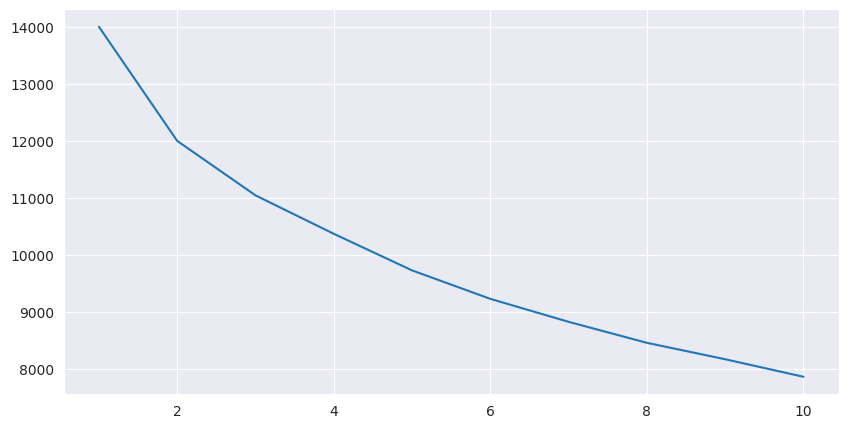

In [ ]:
wcss = []

for i in range(1, 11):
  km = KMeans(n_clusters=i, random_state=42)
  km.fit(df_scaled)
  wcss.append(km.inertia_)

# Elbow method
plt.figure(figsize=(10, 5))
sns.lineplot(x= range(1,11), y= wcss)


In [ ]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(df_scaled)
labels = km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df["labels"] = labels

In [ ]:
df.head()

,gender,age,annual_income,spending_score,profession,work_experience,family_size,labels
0,Male,19,15000,39,Healthcare,1,4,1
1,Male,21,35000,81,Engineer,3,3,1
2,Female,20,86000,6,Engineer,1,1,0
3,Female,23,59000,77,Lawyer,0,2,0
4,Female,31,38000,40,Entertainment,2,6,0


In [ ]:
df["labels"].value_counts()

labels
0    1186
1     814
Name: count, dtype: int64

## Analyzing Characteristics of the identified clusters

#### Plot Categorical Features with each Cluster

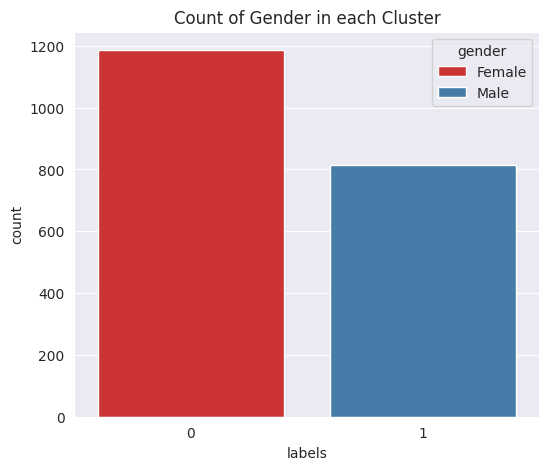

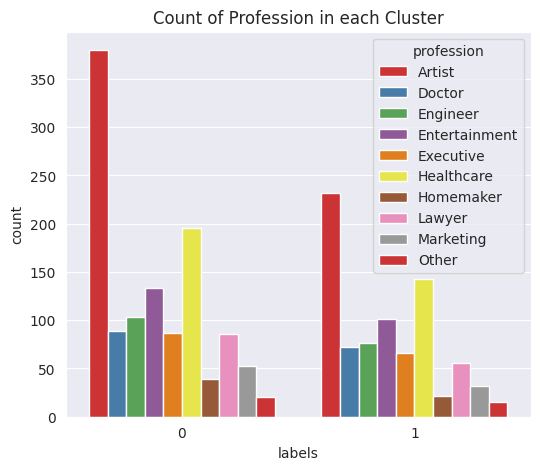

In [ ]:
for col in cat_columns:
  fig, axes = plt.subplots(figsize=(6, 5))
  sns.countplot(data=df, x="labels", hue=col, order=sorted(df["labels"].unique()), hue_order=sorted(df[col].unique()), palette="Set1")
  axes.set_title(f"Count of {col.replace('_', ' ').title()} in each Cluster")

#### Distribution of Numerical Features with each Cluster

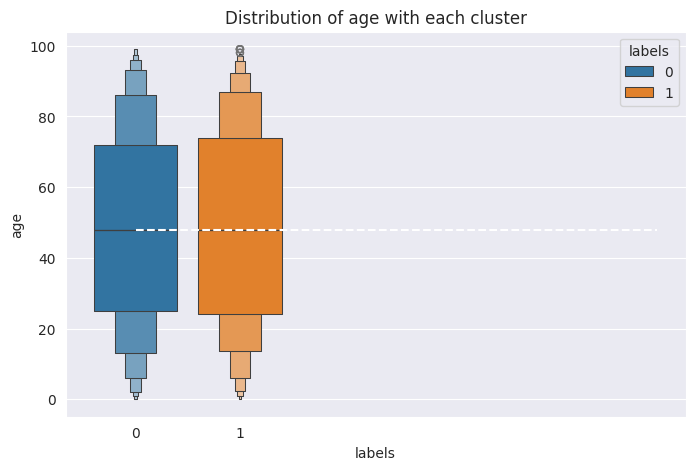

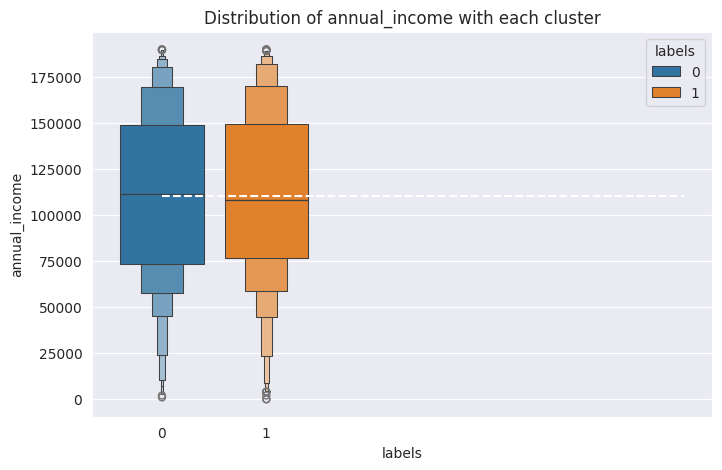

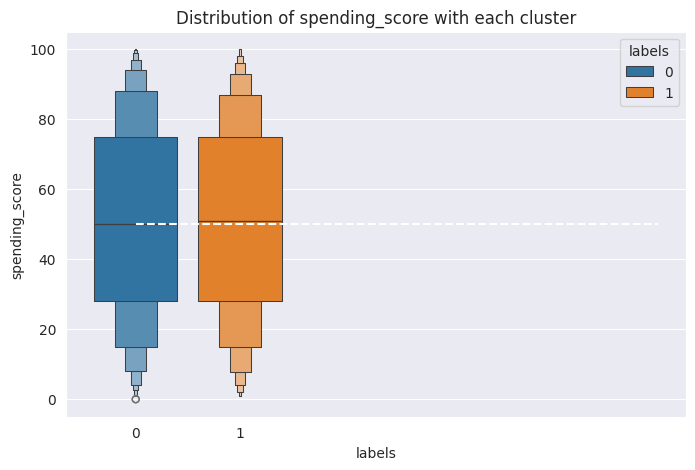

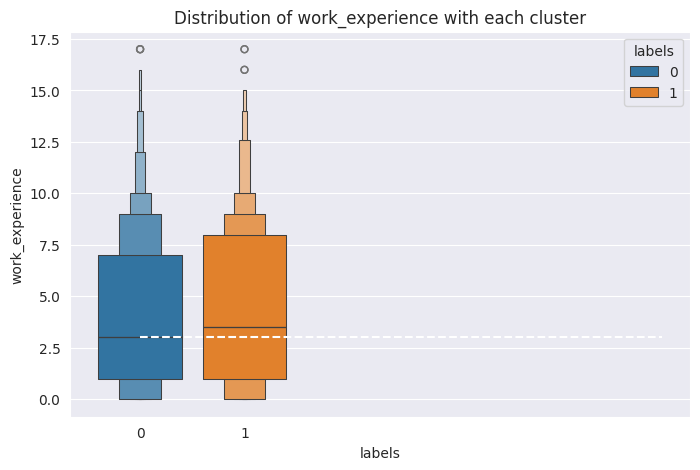

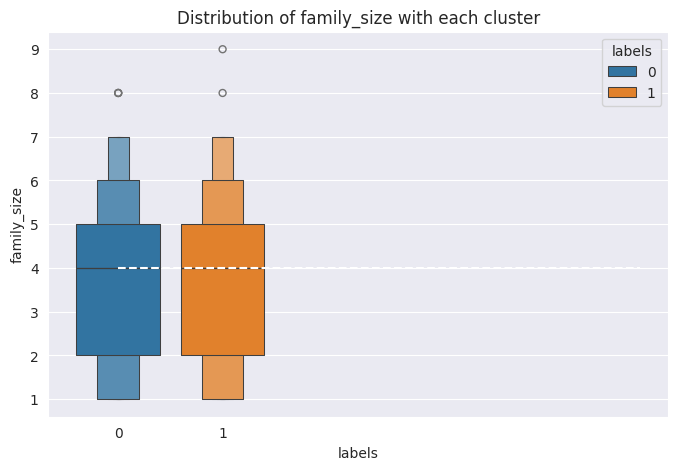

In [ ]:
for col in num_columns:
  fig, axes = plt.subplots(figsize=(8,5))

  sns.boxenplot( data= df, x= "labels", y= col, order=sorted(df["labels"].unique()), hue="labels", palette="tab10")
  plt.hlines(y= df[col].median(), xmin= 0, xmax= 5, color= "w", linestyles="dashed")
  axes.set_title(f"Distribution of {col} with each cluster")

## Conclusions

**Cluster 0**

* Exclusively for female.
* Mixed in terms of profession.
* All age group presnt.
* All income groups are present.
* All spending scores are present.
* All Work experience are present.
* All family size are presnt.

**In Short: Female customers are present.**


**Cluster 1**

* Exclusively for male.
* Exclusively for single.
* Mostly for higher education level.
* Mixed in terms of occupation, but mostly from medium level.
* Mixed in terms of city size. Leaning towards medium and big cities.
* 35- 45 age group people mostly present.
* Slightly above average income compared to other mall visitors.

**In Short: Male customers are present**